In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import fbprophet as fb

df = pd.read_json('/Users/mattmastin/Desktop/groupme/message.json')

In [71]:
df.head()

,attachments,avatar_url,created_at,favorited_by,group_id,id,name,sender_id,sender_type,source_guid,system,text,user_id,platform,event
0,[],https://i.groupme.com/750x750.jpeg.8b8c04dce57...,2020-08-18 21:10:40,[],10339610,159778504032484320,Zillig,21971415,user,2A80742B-7537-4363-975B-FC989E8603EF,False,That’s a must answer,21971415,gm,NaN
1,[],https://i.groupme.com/750x750.jpeg.8b8c04dce57...,2020-08-18 21:10:34,[3110219],10339610,159778503425768896,Zillig,21971415,user,510FDF25-797A-42F2-9C9B-3A05EB69F223,False,Why would you not pick that up?,21971415,gm,NaN
2,[],https://i.groupme.com/200x122.jpeg.fff46e24975...,2020-08-18 21:09:06,[21971415],10339610,159778494650336000,Tellekamp,19362430,user,51E52E1B-843B-47BC-80BD-50FB87D3C9ED,False,He was a weird dude with a hot girlfriend we m...,19362430,gm,NaN
3,[],https://i.groupme.com/200x200.jpeg.6d00908c572...,2020-08-18 21:08:20,[],10339610,159778490021269120,Clay,21971418,user,6EA47D21-7E2B-4502-973F-B6FAA3C5413A,False,That gives me so much anxiety,21971418,gm,NaN
4,[],https://i.groupme.com/990f07700bf501303cf21231...,2020-08-18 21:07:39,[],10339610,159778485912434048,Alex Lassiter 2,7557656,user,6FC85D37-C906-4DD0-A948-9C3E559D302B,False,Who is that,7557656,gm,NaN


In [66]:
# ids = list(df.groupby('user_id'))
# ids

In [93]:
df.tail()

,created_at,favorited_by,name,sender_type,system,text
65390,2014-09-28 22:49:49,[],Zillig,user,False,What is this
65391,2014-09-28 22:49:28,[19108641],Bobby,user,False,�
65392,2014-09-28 22:49:07,[],Tellekamp,user,False,And the app has cool emoticons �
65398,2014-09-28 22:48:51,[],Sciolto,user,False,I'm a fan
65399,2014-09-28 22:48:48,[],Sciolto,user,False,This is still extremely easy
65400,2014-09-28 22:48:29,[],Clay,user,False,Awesome
65401,2014-09-28 22:48:18,[],Tim Brunt,user,False,Yes. But if you use the app it's easier
65402,2014-09-28 22:48:01,[],Sciolto,user,False,Is this text going through?
65403,2014-09-28 22:47:51,[],Sciolto,user,False,I'm confused
65404,2014-09-28 22:46:50,[],Tellekamp,user,False,I don't think you need an app. It's pretty eas...


In [328]:
df = df[['created_at', 'favorited_by', 'name','text', 'id', 'sender_type']]

df.head()

,created_at,favorited_by,name,text,id,sender_type
0,2020-08-18 21:10:40,[],Zillig,That’s a must answer,159778504032484320,user
1,2020-08-18 21:10:34,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user
2,2020-08-18 21:09:06,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user
3,2020-08-18 21:08:20,[],Clay,That gives me so much anxiety,159778490021269120,user
4,2020-08-18 21:07:39,[],Alex Lassiter 2,Who is that,159778485912434048,user


In [73]:
df.shape

(65413, 6)

In [329]:
df = df[df['sender_type'].str.contains('user')]

In [12]:
df.shape

(65318, 6)

In [22]:
df.head()

,created_at,favorited_by,name,sender_type,system,text
0,2020-08-18 21:10:40,[],Zillig,user,False,That’s a must answer
1,2020-08-18 21:10:34,[3110219],Zillig,user,False,Why would you not pick that up?
2,2020-08-18 21:09:06,[21971415],Tellekamp,user,False,He was a weird dude with a hot girlfriend we m...
3,2020-08-18 21:08:20,[],Clay,user,False,That gives me so much anxiety
4,2020-08-18 21:07:39,[],Alex Lassiter 2,user,False,Who is that


In [330]:
df = df[df.name != 'Bobby Lawrence']
df = df[df.name != 'Browens']
df = df[df.name != 'Eric Tellekamp']
df = df[df.name != 'Lamoureaux']
df = df[df.name != 'Marc Weber']
df = df[df.name != 'Matt Mastin']
df = df[df.name != 'Nikolas Ortega']
df = df[df.name != 'Zach Ducey']
df = df[df.name != 'Zach Illig']
df = df[df.name != 'Alex Lassiter']

In [78]:
names = df.groupby(['name']).count()
names

,created_at,favorited_by,text,id,sender_type
name,,,,,
Alex Lassiter 2,5582,5582,4969,5582,5582
Baker,779,779,713,779,779
Bobby,6504,6504,6394,6504,6504
Clay,1402,1402,1380,1402,1402
Cody,2955,2955,2890,2955,2955
Connor Kenan,6254,6254,6145,6254,6254
Ducey,6823,6823,6527,6823,6823
Marc Weber,5,5,5,5,5
Mastin,6934,6934,6456,6934,6934


In [15]:
sorted_names = names.sort_values('text', ascending=False)
sorted_names

,created_at,favorited_by,sender_type,system,text
name,,,,,
Tellekamp,9994,9994,9994,9994,9440
Ducey,6823,6823,6823,6823,6527
Mastin,6934,6934,6934,6934,6456
Bobby,6504,6504,6504,6504,6394
Connor Kenan,6254,6254,6254,6254,6145
Zillig,6197,6197,6197,6197,5700
Alex Lassiter 2,5582,5582,5582,5582,4969
Sciolto,4322,4322,4322,4322,3884
Owens,3668,3668,3668,3668,3279


In [16]:
sorted_names.reset_index()

,name,created_at,favorited_by,sender_type,system,text
0,Tellekamp,9994,9994,9994,9994,9440
1,Ducey,6823,6823,6823,6823,6527
2,Mastin,6934,6934,6934,6934,6456
3,Bobby,6504,6504,6504,6504,6394
4,Connor Kenan,6254,6254,6254,6254,6145
5,Zillig,6197,6197,6197,6197,5700
6,Alex Lassiter 2,5582,5582,5582,5582,4969
7,Sciolto,4322,4322,4322,4322,3884
8,Owens,3668,3668,3668,3668,3279
9,Cody,2955,2955,2955,2955,2890


In [331]:
import matplotlib.pyplot as plt

# plt.bar(sorted_names['name'], sorted_names['text'])
# plt.show();

In [23]:
import re 
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mattmastin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mattmastin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
words = df[['name', 'text']]
words.head()

,name,text
0,Zillig,That’s a must answer
1,Zillig,Why would you not pick that up?
2,Tellekamp,He was a weird dude with a hot girlfriend we m...
3,Clay,That gives me so much anxiety
4,Alex Lassiter 2,Who is that


In [21]:
import re

def tokenize(text):
    tokens = re.sub(r'^a-zA-Z ^0-9', '', str(text))
    tokens = tokens.lower().split()
    return tokens

words['tokens'] = words['text'].apply(tokenize)

<ipython-input-21-e9a05a025edb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  words['tokens'] = words['text'].apply(tokenize)


In [22]:
words.head()

,name,text,tokens
0,Zillig,That’s a must answer,"[that’s, a, must, answer]"
1,Zillig,Why would you not pick that up?,"[why, would, you, not, pick, that, up?]"
2,Tellekamp,He was a weird dude with a hot girlfriend we m...,"[he, was, a, weird, dude, with, a, hot, girlfr..."
3,Clay,That gives me so much anxiety,"[that, gives, me, so, much, anxiety]"
4,Alex Lassiter 2,Who is that,"[who, is, that]"


In [108]:
!python -m spacy download en_core_web_lg

/Users/mattmastin/.pyenv/versions/3.7.4/bin/python: No module named spacy


In [109]:
!pip install -U spacy

     |████████████████████████████████| 10.0 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 1.4 MB/s eta 0:00:01
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
     |████████████████████████████████| 4.0 MB 1.3 MB/s eta 0:00:01
  Using cached murmurhash-1.0.2-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (34 kB)
     |████████████████████████████████| 68 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 54 kB 863 kB/s eta 0:00:01
     |████████████████████████████████| 211 kB 1.4 MB/s eta 0:00:01
  Created wheel for wasabi: filename=wasabi-0.7.1-py3-none-any.whl size=20835 sha256=1768b7a74914290d9c0dabdb9d07b1ee24e4a6457209edb1a1ffc5cc96968c3e
  Stored in directory: /Users/mattmastin/Library/Caches/pip/wheels/dc/5e/d4/727b6213e9ebec502ff1bf5998f4a83fef87c3aace8a492243
Successfully built wasabi
ERROR: After Octob

In [4]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 782.7 MB 1.8 MB/s eta 0:00:014   |▌                               | 13.5 MB 82 kB/s eta 2:35:51     |█▋                              | 38.5 MB 1.4 MB/s eta 0:09:11     |██▏                             | 53.6 MB 1.2 MB/s eta 0:09:50     |██▊                             | 65.8 MB 673 kB/s eta 0:17:45     |███▎                            | 80.5 MB 1.2 MB/s eta 0:09:48     |█████▏                          | 125.8 MB 792 kB/s eta 0:13:49     |█████▌                          | 133.9 MB 933 kB/s eta 0:11:35     |█████▌                          | 134.0 MB 933 kB/s eta 0:11:35     |███████                         | 169.2 MB 1.3 MB/s eta 0:07:39     |███████                         | 170.1 MB 1.3 MB/s eta 0:07:38     |████████▉                       | 214.8 MB 2.2 MB/s eta 0:04:23     |██████████▌                     | 256.5 MB 1.3 MB/s eta 0:06:45     |███████████▉                    | 290.2 MB 1.5 MB/s eta 0:05:32     |██████████████▏                 | 3

In [30]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 575 kB/s eta 0:00:01    |█████████▉                      | 3.7 MB 733 kB/s eta 0:00:12
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047106 sha256=d80e69493c860832a6cb9849da075763d056c454b8cd35812b26b4f2c60a36eb
  Stored in directory: /private/var/folders/5x/1ys8f82d07q7y_jsqntsm_jm0000gn/T/pip-ephem-wheel-cache-n48f32ao/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/mattmastin/.pyenv/versions/3.7.4/lib/python3.7/site-packages/en_core_web_sm
-->
/Users/mattmastin/.pyenv/versions/3.7.4/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [24]:
from spacy.tokenizer import Tokenizer
import spacy
# import en_core_web_lg

# nlp = en_core_web_lg.load()

# nlp = spacy.load('en_core_web_lg')

# tokenizer = Tokenizer(nlp.vocab)

# tokens = []

# for doc in tokenizer.pipe(words['text'], batch_size=500):
#     doc_tokens = []
#     for token in doc:
#         if (token.is_stop == False) & (token.is_punct == False):
#             doc_tokens.append(token.text.lower())
            
#     tokens.append(doc_tokens)
    
# words['tokens'] = tokens

In [26]:
from collections import Counter

def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns=['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct']= wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

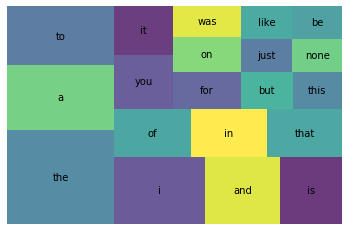

In [28]:
import squarify
import matplotlib.pyplot as plt

wc = count(words['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'],
             alpha=0.8)
plt.axis('off')
plt.show();

In [332]:
from spacy.tokenizer import Tokenizer
import spacy
# import en_core_web_lg

# nlp = en_core_web_lg.load()

# nlp = spacy.load('en')

In [5]:
# !python -m spacy link en_core_web_lg en


✘ Link 'en' already exists
To overwrite an existing link, use the --force flag



In [29]:
df.head()

,created_at,favorited_by,name,sender_type,system,text
0,2020-08-18 21:10:40,[],Zillig,user,False,That’s a must answer
1,2020-08-18 21:10:34,[3110219],Zillig,user,False,Why would you not pick that up?
2,2020-08-18 21:09:06,[21971415],Tellekamp,user,False,He was a weird dude with a hot girlfriend we m...
3,2020-08-18 21:08:20,[],Clay,user,False,That gives me so much anxiety
4,2020-08-18 21:07:39,[],Alex Lassiter 2,user,False,Who is that


In [41]:
df.drop(columns=['date'])

,created_at,favorited_by,name,sender_type,system,text
0,2020-08-18 21:10:40,[],Zillig,user,False,That’s a must answer
1,2020-08-18 21:10:34,[3110219],Zillig,user,False,Why would you not pick that up?
2,2020-08-18 21:09:06,[21971415],Tellekamp,user,False,He was a weird dude with a hot girlfriend we m...
3,2020-08-18 21:08:20,[],Clay,user,False,That gives me so much anxiety
4,2020-08-18 21:07:39,[],Alex Lassiter 2,user,False,Who is that
...,...,...,...,...,...,...
65406,2014-09-28 22:46:05,[],Baker,user,False,Do i need an app
65407,2014-09-28 22:45:30,[],Tim Brunt,user,False,Change it in the settings. You can also mute t...
65409,2014-09-28 22:43:52,[],Tellekamp,user,False,It still sends me a text every time too
65410,2014-09-28 22:43:01,[],Steve,user,False,Perfect title


In [45]:
import datetime as dt

df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
df['time'] = df['created_at'].dt.hour

In [46]:
df.head()

,created_at,favorited_by,name,sender_type,system,text,date,month,year,time
0,2020-08-18 21:10:40,[],Zillig,user,False,That’s a must answer,NaT,8,2020,21
1,2020-08-18 21:10:34,[3110219],Zillig,user,False,Why would you not pick that up?,NaT,8,2020,21
2,2020-08-18 21:09:06,[21971415],Tellekamp,user,False,He was a weird dude with a hot girlfriend we m...,NaT,8,2020,21
3,2020-08-18 21:08:20,[],Clay,user,False,That gives me so much anxiety,2020-08-18 21:08:20,8,2020,21
4,2020-08-18 21:07:39,[],Alex Lassiter 2,user,False,Who is that,2020-08-18 21:07:39,8,2020,21


In [56]:
weber = df[df['name'].str.contains('Marc Weber')]

In [79]:
pd.set_option('display.width', 1000)

In [80]:
weber

,created_at,favorited_by,name,text
18716,2019-10-11 13:32:44,"[18595305, 21971415, 21971420, 490903]",Marc Weber,Lol can’t wait!
18719,2019-10-11 13:02:19,"[18595305, 19108641, 19362430, 21971415, 21971...",Marc Weber,👀
45174,2017-01-04 22:53:48,[],Marc Weber,Haha you know me
45179,2017-01-04 19:21:42,"[18595305, 21971415]",Marc Weber,lol y'all forgot about me 😞
45184,2017-01-04 19:08:11,"[18595305, 19108641, 19362430, 21971415, 21971...",Marc Weber,Welcome to the team.


In [81]:
import fbprophet

ModuleNotFoundError: No module named 'fbprophet'

In [84]:
!pip install pystan
!pip install fbprophet

  Using cached fbprophet-0.6.tar.gz (54 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/mattmastin/.pyenv/versions/3.7.4/bin/python3.7 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/5x/1ys8f82d07q7y_jsqntsm_jm0000gn/T/pip-install-ht7nq42g/fbprophet/setup.py'"'"'; __file__='"'"'/private/var/folders/5x/1ys8f82d07q7y_jsqntsm_jm0000gn/T/pip-install-ht7nq42g/fbprophet/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/5x/1ys8f82d07q7y_jsqntsm_jm0000gn/T/pip-wheel-211autqm
       cwd: /private/var/folders/5x/1ys8f82d07q7y_jsqntsm_jm0000gn/T/pip-install-ht7nq42g/fbprophet/
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib
  creating build/lib/fbprophet
  creating build/lib/fbprophet/stan_model
  Importing

In [83]:
# !pip install --upgrade pip setuptools wheel

Requirement already up-to-date: pip in /Users/mattmastin/.pyenv/versions/3.7.4/lib/python3.7/site-packages (20.2.2)
     |████████████████████████████████| 803 kB 768 kB/s eta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 45.0.0
    Uninstalling setuptools-45.0.0:
      Successfully uninstalled setuptools-45.0.0
  Attempting uninstall: wheel
    Found existing installation: wheel 0.33.6
    Uninstalling wheel-0.33.6:
      Successfully uninstalled wheel-0.33.6
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

twine 1.13.0 requires pkginfo>=1.4.2, which is not installed.


In [90]:
df = df.rename(columns={'created_at': 'date'})
# df.head()

In [91]:
df.head()

,date,favorited_by,name,text,id,sender_type
0,2020-08-18 21:10:40,[],Zillig,That’s a must answer,159778504032484320,user
1,2020-08-18 21:10:34,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user
2,2020-08-18 21:09:06,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user
3,2020-08-18 21:08:20,[],Clay,That gives me so much anxiety,159778490021269120,user
4,2020-08-18 21:07:39,[],Alex Lassiter 2,Who is that,159778485912434048,user


In [95]:
df['week'] = df['date'].dt.weekofyear
df['year'] = df['date'].dt.year

In [96]:
df.head()

,date,favorited_by,name,text,id,sender_type,week,year
0,2020-08-18 21:10:40,[],Zillig,That’s a must answer,159778504032484320,user,34,2020
1,2020-08-18 21:10:34,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user,34,2020
2,2020-08-18 21:09:06,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user,34,2020
3,2020-08-18 21:08:20,[],Clay,That gives me so much anxiety,159778490021269120,user,34,2020
4,2020-08-18 21:07:39,[],Alex Lassiter 2,Who is that,159778485912434048,user,34,2020


In [97]:
# graph = df.groupby(by=['week', 'year'], as_index=False).sum()

In [103]:
graph = pd.crosstab(index=df['week'], columns=df['year'])

In [104]:
graph

year,2014,2015,2016,2017,2018,2019,2020
week,,,,,,,
1,33,147,234,230,281,102,150
2,0,210,280,152,290,385,335
3,0,86,130,56,176,254,206
4,0,65,111,73,223,336,384
5,0,163,81,76,163,236,361
6,0,108,371,78,301,315,181
7,0,90,140,60,161,228,172
8,0,184,99,107,169,261,175
9,0,126,147,131,171,236,281


In [102]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [127]:
# df['month'] = df['date'].dt.month
# months = pd.crosstab(index=df['month'], columns=df['year'])
months = pd.crosstab(df.month, df.year, margins=True)
months

year,2014,2015,2016,2017,2018,2019,2020,All
month,,,,,,,,
1,0,633,766,516,1033,1191,1395,5534
2,0,545,708,331,765,1097,840,4286
3,0,719,618,547,953,1590,2901,7328
4,0,849,620,938,595,763,3260,7025
5,0,834,473,217,336,690,2257,4807
6,0,1183,504,404,629,1044,2764,6528
7,0,1037,376,283,940,936,2597,6169
8,0,1111,330,348,971,737,1015,4512
9,156,776,784,477,1152,1182,0,4527


In [140]:
months2 = df.groupby(['month', 'year'])['month'].count().unstack().fillna(0)

In [141]:
months2

year,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,
1,0.0,633.0,766.0,516.0,1033.0,1191.0,1395.0
2,0.0,545.0,708.0,331.0,765.0,1097.0,840.0
3,0.0,719.0,618.0,547.0,953.0,1590.0,2901.0
4,0.0,849.0,620.0,938.0,595.0,763.0,3260.0
5,0.0,834.0,473.0,217.0,336.0,690.0,2257.0
6,0.0,1183.0,504.0,404.0,629.0,1044.0,2764.0
7,0.0,1037.0,376.0,283.0,940.0,936.0,2597.0
8,0.0,1111.0,330.0,348.0,971.0,737.0,1015.0
9,156.0,776.0,784.0,477.0,1152.0,1182.0,0.0


In [123]:
month = months.index.tolist()

In [124]:
month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [134]:
# months["'14"] = months['2014']
# new_df = months['month']['year']
months.columns.name

'year'

In [136]:
months.index.name

'month'

In [152]:
# months3 = []

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')

# fig, ax = plt.subplots(figsize=(14, 10))

# ax1 = sns.lineplot(x=month, y=months2['2014'], color='#0F95D&', lw=2.5)

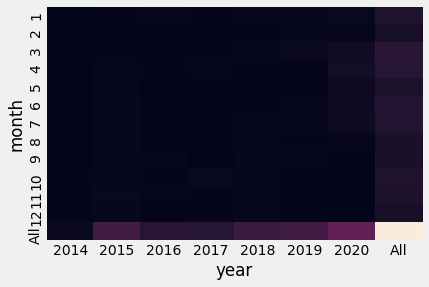

In [149]:
sns.heatmap(months, cbar=False)

In [157]:
likes = pd.read_json('/Users/mattmastin/Desktop/groupme/likes/mine.json')

In [158]:
likes.head()

,meta,response
code,200.0,NaN
messages,nan,"[{'id': '159778503425768882', 'source_guid': '..."


In [265]:
y2014 = pd.Series([0, 0, 0, 0, 0, 0, 0 , 0, 156, 567, 462, 644], index=['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December'])
y2015 = pd.Series([633, 545, 719, 849, 834, 1183, 1037 , 1111, 776, 975, 1306, 1268], index=['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December'])
y2016 = pd.Series([766, 708, 618, 620, 473, 504, 376, 330, 784, 740, 830, 340], index=['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December'])
y2017 = pd.Series([513, 331, 547, 938, 217, 404, 283, 348, 477, 1288, 722, 637], index=['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December'])
y2018 = pd.Series([1033, 765, 953, 595, 336, 629, 940, 971, 1152, 1024, 1032, 810], index=['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December'])
y2019 = pd.Series([1191, 1097, 1590, 763, 690, 1044, 936, 737, 1182, 684, 600, 635], index=['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December'])
y2020 = pd.Series([1395, 840, 2901, 3260, 2257, 2764, 2597, 1015, 0, 0 , 0 , 0], index=['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December'])

In [171]:
month2 = ['January', 
                'February', 'March', 'April', 'May', 'June', 'July', 'August',
                'September', 'October', 'November', 'December']

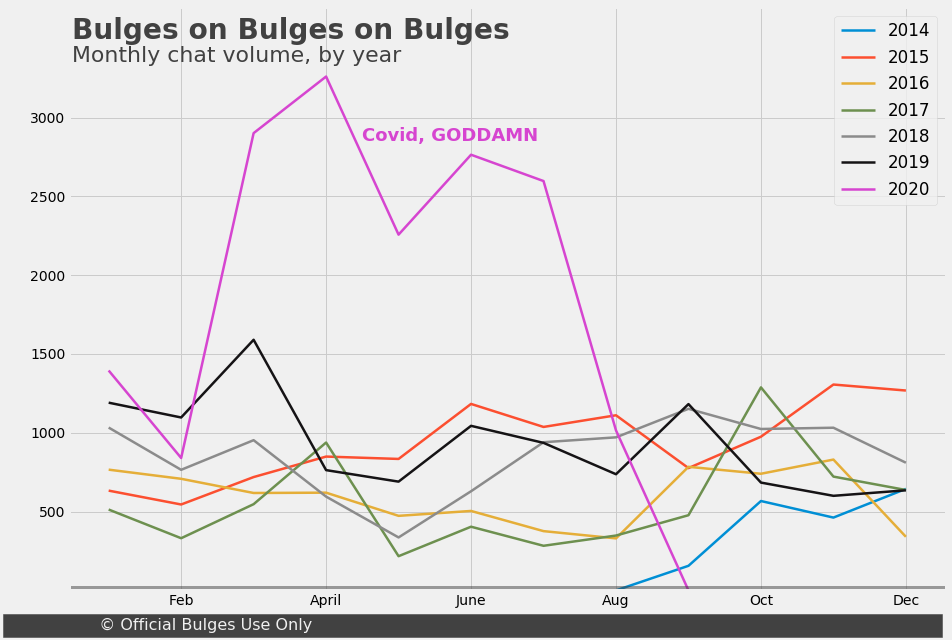

In [267]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(14, 10))

plt.ylim(0, 3700)

ax1 = sns.lineplot(x=month, y=y2014, lw=2.5)
ax2 = sns.lineplot(x=month, y=y2015, lw=2.5)
ax1 = sns.lineplot(x=month, y=y2016, lw=2.5)
ax1 = sns.lineplot(x=month, y=y2017, lw=2.5)
ax1 = sns.lineplot(x=month, y=y2018, lw=2.5)
ax1 = sns.lineplot(x=month, y=y2019, lw=2.5, color='#151315')
ax1 = sns.lineplot(x=month, y=y2020, lw=2.5, color='#d645d0')

ax1.axhline(y=0, color='#414141', linewidth=8, alpha=0.5)

ax.set_yticks([500, 1000, 1500, 2000, 2500, 3000])

ax.set_xticks([2, 4, 6, 8, 10, 12])
ax.set_xticklabels(['Feb', 'April', 'June', 'Aug', 'Oct', 'Dec'])

ax.text(x=0.5, y=3500, s='Bulges on Bulges on Bulges', fontsize=28, fontweight='semibold',
       color='#414141')
ax.text(x=0.5, y=3350, s='Monthly chat volume, by year', fontsize=22, color='#414141')
ax.text(x=4.5, y=2850, s='Covid, GODDAMN', fontsize=18, fontweight='semibold', color='#d645d0')

plt.legend(loc='best', fontsize='large', labels =['2014', '2015', '2016', '2017', '2018', '2019', '2020'])

ax1.text(x=-.4, y=-250,
        s= '                  © Official Bulges Use Only                                                                                                                          ',
        fontsize=16, color = '#f0f0f0', backgroundcolor = '#414141');

In [335]:
# df['time'] = df['date'].dt.hour.astype(int) + '.' + df['date'].dt.minute.astype(int)

# df['time'] = df['created_at'].dt.time

In [336]:
df.head()

,created_at,favorited_by,name,text,id,sender_type,time
0,2020-08-18 21:10:40,[],Zillig,That’s a must answer,159778504032484320,user,21:10:40
1,2020-08-18 21:10:34,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user,21:10:34
2,2020-08-18 21:09:06,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user,21:09:06
3,2020-08-18 21:08:20,[],Clay,That gives me so much anxiety,159778490021269120,user,21:08:20
4,2020-08-18 21:07:39,[],Alex Lassiter 2,Who is that,159778485912434048,user,21:07:39


In [283]:
df.dtypes

date            datetime64[ns]
favorited_by            object
name                    object
text                    object
id                       int64
sender_type             object
week                     int64
year                     int64
month                    int64
time                    object
dtype: object

In [323]:
# df['time'] = df['date'].dt.time.floor('Min')
# df['date'] = print(map(lambda s: s[:3], df['date']))

In [295]:
df['date'] = df['time']

In [296]:
df.head()

,date,favorited_by,name,text,id,sender_type,week,year,month,time
0,2020-08-18 21:10:00,[],Zillig,That’s a must answer,159778504032484320,user,34,2020,8,2020-08-18 21:10:00
1,2020-08-18 21:10:00,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user,34,2020,8,2020-08-18 21:10:00
2,2020-08-18 21:09:00,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user,34,2020,8,2020-08-18 21:09:00
3,2020-08-18 21:08:00,[],Clay,That gives me so much anxiety,159778490021269120,user,34,2020,8,2020-08-18 21:08:00
4,2020-08-18 21:07:00,[],Alex Lassiter 2,Who is that,159778485912434048,user,34,2020,8,2020-08-18 21:07:00


In [347]:
df['time'] = df['created_at'].apply(lambda t: t.strftime('%H%M'))

In [348]:
df.head()

,created_at,favorited_by,name,text,id,sender_type,time,time2
0,2020-08-18 21:10:40,[],Zillig,That’s a must answer,159778504032484320,user,2110,21.10
1,2020-08-18 21:10:34,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user,2110,21.10
2,2020-08-18 21:09:06,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user,2109,21.09
3,2020-08-18 21:08:20,[],Clay,That gives me so much anxiety,159778490021269120,user,2108,21.08
4,2020-08-18 21:07:39,[],Alex Lassiter 2,Who is that,159778485912434048,user,2107,21.07


In [349]:
df.dtypes

created_at      datetime64[ns]
favorited_by            object
name                    object
text                    object
id                       int64
sender_type             object
time                    object
time2                   object
dtype: object

In [319]:
import time



# df['time'] = repr(df['time'])
# df['time'] = df['time'].replace(':', '.')

In [341]:
df.head()

,created_at,favorited_by,name,text,id,sender_type,time
0,2020-08-18 21:10:40,[],Zillig,That’s a must answer,159778504032484320,user,21.10
1,2020-08-18 21:10:34,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user,21.10
2,2020-08-18 21:09:06,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user,21.09
3,2020-08-18 21:08:20,[],Clay,That gives me so much anxiety,159778490021269120,user,21.08
4,2020-08-18 21:07:39,[],Alex Lassiter 2,Who is that,159778485912434048,user,21.07


In [342]:
df['time2'] = df['time'][:5]

In [343]:
df.head()

,created_at,favorited_by,name,text,id,sender_type,time,time2
0,2020-08-18 21:10:40,[],Zillig,That’s a must answer,159778504032484320,user,21.10,21.10
1,2020-08-18 21:10:34,[3110219],Zillig,Why would you not pick that up?,159778503425768896,user,21.10,21.10
2,2020-08-18 21:09:06,[21971415],Tellekamp,He was a weird dude with a hot girlfriend we m...,159778494650336000,user,21.09,21.09
3,2020-08-18 21:08:20,[],Clay,That gives me so much anxiety,159778490021269120,user,21.08,21.08
4,2020-08-18 21:07:39,[],Alex Lassiter 2,Who is that,159778485912434048,user,21.07,21.07


In [344]:
df.dtypes

created_at      datetime64[ns]
favorited_by            object
name                    object
text                    object
id                       int64
sender_type             object
time                    object
time2                   object
dtype: object

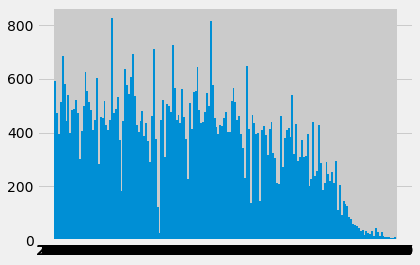

In [350]:
plt.hist(df['time'], bins=180)
plt.show();